<a href="https://colab.research.google.com/github/KaveeshBaddage/DataScienceImpl/blob/main/Time_Series_Analysis_219315E_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install sodapy on Notebook which is a Python binding  the Socrata Open Data API**


In [ ]:
!pip install sodapy

**Get data set from Socrata Open Data API**

In [ ]:
import pandas as pd
from sodapy import Socrata

def download_dataset(domain, dataset_id):
    # for this exercise, we're not using an app token,
    # but you *should* sign-up and register for an app_token if you want to use the Socrata API
    client = Socrata(domain, app_token=None)
    offset = None
    data = []
    batch_size = 1000

    while True:
        records = client.get(dataset_id, offset=offset, limit=batch_size)
        data.extend(records)
        if len(records) < batch_size:
            break
        offset = offset + batch_size if (offset) else batch_size

    return pd.DataFrame.from_dict(data)

def download_covid_dataset():
    return covid_dataset1 if "covid_dataset1" in globals() else download_dataset("data.sccgov.org", "tg4j-23y2")

# load Covid 19 patients data
covid_dataset1 = download_covid_dataset()

**Print first 10 data rows and check how data are distributed into columns**

In [ ]:
print(len(covid_dataset1))
covid_dataset1.head(10)

284


,date,ltcf,non_ltcf,total,cumulative
0,2020-02-06T00:00:00.000,0,1,1,1
1,2020-02-17T00:00:00.000,0,1,1,2
2,2020-03-06T00:00:00.000,0,1,1,3
3,2020-03-09T00:00:00.000,0,2,2,5
4,2020-03-13T00:00:00.000,0,1,1,6
5,2020-03-15T00:00:00.000,0,2,2,8
6,2020-03-17T00:00:00.000,0,3,3,11
7,2020-03-20T00:00:00.000,0,2,2,13
8,2020-03-21T00:00:00.000,0,2,2,15
9,2020-03-22T00:00:00.000,0,2,2,17


**Select columns from the data set**

In [ ]:
covid_dataset1.drop(["ltcf","total","cumulative"], axis=1, inplace=True)
covid_dataset1.head(10)

,date,non_ltcf
0,2020-02-06T00:00:00.000,1
1,2020-02-17T00:00:00.000,1
2,2020-03-06T00:00:00.000,1
3,2020-03-09T00:00:00.000,2
4,2020-03-13T00:00:00.000,1
5,2020-03-15T00:00:00.000,2
6,2020-03-17T00:00:00.000,3
7,2020-03-20T00:00:00.000,2
8,2020-03-21T00:00:00.000,2
9,2020-03-22T00:00:00.000,2


**Select dependent and independent variables**

In [24]:
covid_dataset1["date"] = covid_dataset1["date"].apply(pd.to_datetime)
covid_dataset1.head(10)
date = covid_dataset1['date'].values
deaths = covid_dataset1['non_ltcf'].values

**Define a function to plot a graph**

In [34]:

import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='Date', ylabel='No of Deaths', dpi=100):
  plt.figure(figsize=(16,5), dpi=dpi)
  plt.plot(x, y, color='tab:red')
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.show()

**Plot the graph**

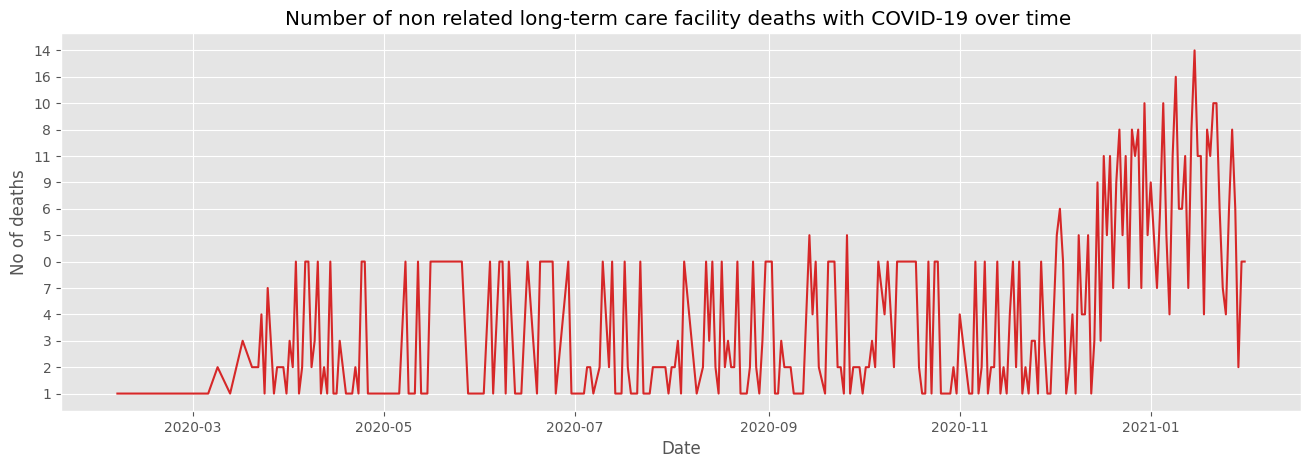

In [33]:
plot_df(covid_dataset1, x=date, y=deaths, title='Number of non related long-term care facility deaths with COVID-19 over time ')

**Forecasting with Prophet**

In [44]:
from fbprophet import Prophet
model = Prophet()
train_df = covid_dataset1.rename(columns={"non_ltcf":'y'})
train_df["ds"] = train_df.date
train_df.head()

model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


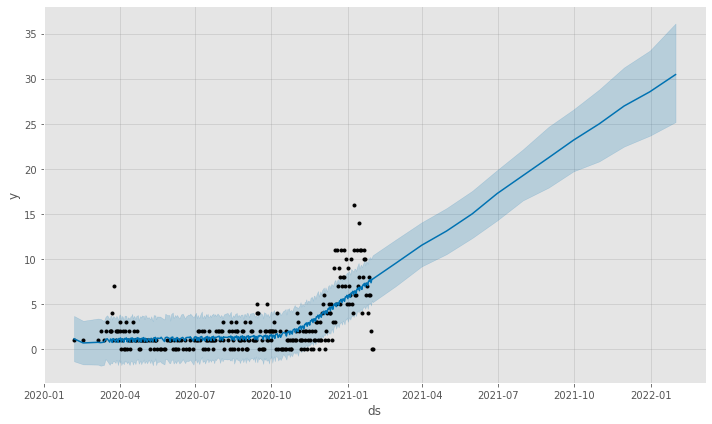

In [52]:
pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(periods=12, freq='M', include_history=True)
forecast = model.predict(future)
fig1 = model.plot(forecast)

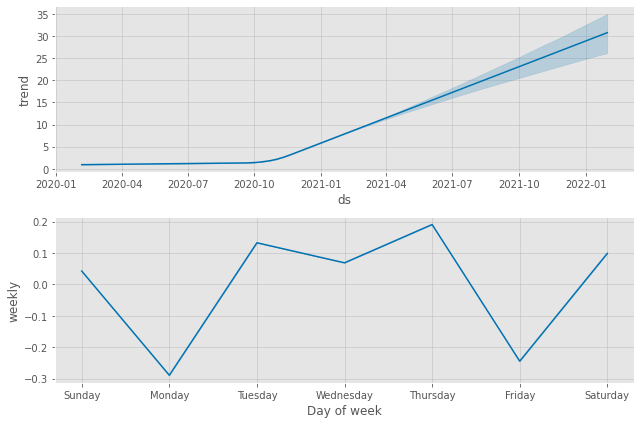

In [48]:
fig2 = model.plot_components(forecast)